In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from matplotlib import pyplot
from iso3166 import countries
from datetime import datetime, timedelta
import plotly.express as px
import warnings


First, we start by getting the essential libraries.

Let's Ignore some warning

In [2]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
df=pd.read_csv('mission_launches.csv')

Now, let us have a look at the data.

In [4]:
df.head()

Unnamed: 0  Unnamed: 0.1 Organisation  \
0           0             0       SpaceX   
1           1             1         CASC   
2           2             2       SpaceX   
3           3             3    Roscosmos   
4           4             4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

So, we can see that the data contains:

1. Company launching the space mission.

2. Location of the launch.

3. Date and time of launch.

4. Launch details.

5. Status of the rocket.

6. Mission status.

7. Rocket.

This information is enough to understand the human space missions and the human space race. Human exploration into space is an interesting aspect of human history and large parts of it happened in the last 60 years.

Let us have a look at the data types and number of data points.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


So, there are over 4000 data points.

First, we need to format the dates. For this, we shall use pandas.

# data processing

In [6]:
df['DateTime'] = pd.to_datetime(df['Date'])

In [7]:
#getting the launch year
df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)

In [8]:
#getting the country of launch
df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1])

In [9]:
df.Country

0              USA
1            China
2              USA
3       Kazakhstan
4              USA
           ...    
4319           USA
4320           USA
4321           USA
4322    Kazakhstan
4323    Kazakhstan
Name: Country, Length: 4324, dtype: object

Next, we get the day of the week when the launch was performed.



In [10]:
#getting the launch day of week
df['Day']=df['Date'].apply(lambda Date: Date.split()[0])

Similarly, we get the data for the month of launch.

In [11]:
#getting the month of launch
df['Month']=df['Date'].apply(lambda date: date.split()[1])

Other data taken are the day ( in a month) of launch and launch hour.

In [12]:
#getting the date of launch ( in a month )
df['Date_of_Launch']=df['Date'].apply(lambda datum: datum.split()[2][:2]).astype(int)
#getting the hour of launch
df['Hour_of_Launch']=df['Date'].apply(lambda datum: int(datum.split()[-2][:2]) if datum.split()[-1]=='UTC' else np.nan)

Now, we need to modify some data points for some particular needs.

We will assign the proper names to some launches. This is to be done for the sake of simplicity.

The following locations are actually territories of the following countries.

In [13]:
list_countries = {'Gran Canaria': 'USA', 
                'Barents Sea': 'Russian Federation',
                'Russia': 'Russian Federation',
                'Pacific Missile Range Facility': 'USA', 
                'Shahrud Missile Test Site': 'Iran, Islamic Republic of', 
                'Yellow Sea': 'China', 
                'New Mexico': 'USA',
                'Iran': 'Iran, Islamic Republic of',
                'North Korea': "Korea, Democratic People's Republic of",
                'Pacific Ocean': 'United States Minor Outlying Islands',
                 'South Korea': 'Korea, Republic of'}
for country in list_countries:
    df.Country = df.Country.replace(country, list_countries[country])

Now, let us have a look at the data.

In [14]:
df.head()

Unnamed: 0  Unnamed: 0.1 Organisation  \
0           0             0       SpaceX   
1           1             1         CASC   
2           2             2       SpaceX   
3           3             3    Roscosmos   
4           4             4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status                   DateTime  Year  \
0  StatusActive   50.0        Success  2020-08-07 05:12:00+00:00  2020   
1  StatusActive  29.75        Success  2020-08-06 04:01:00+00:00  2020   
2  StatusActive    NaN        Success  2020-08-04 23:57:00+00:00  2020   
3  StatusActive   65.0        Success  2020-07-30 21:25:00+00:00  2020   
4  StatusActive  145.0        Success  2020-07-30 11:50:00+00:00  2020   

      Country  Day Month  Date_of_Launch  Hour_of_Launch  
0         USA  Fri   Aug               7             5.0  
1       China  Thu   Aug               6             4.0  
2         USA  Tue   Aug               4            23.0  
3  Kazakhstan  Thu   Jul              30            21.0  
4         USA  Thu   Jul              30            11.0

So, the data is modified and is clear for use.

# Exploratory Data Analysis of Human Spaceflight

Let us first see the top 20 which companies conducted the most launches.


<AxesSubplot:xlabel='count', ylabel='Organisation'>

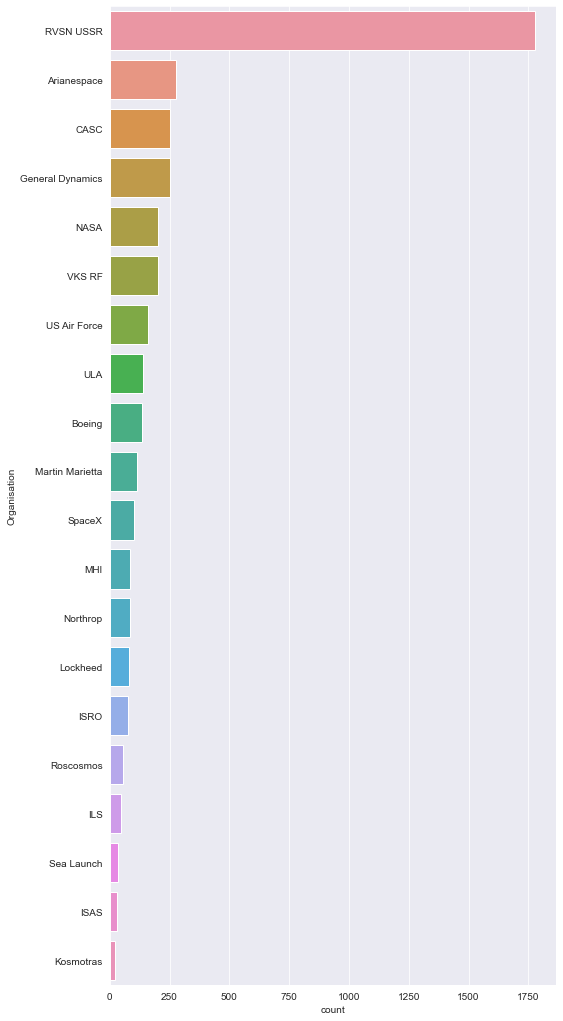

In [15]:
plt.figure(figsize=(8,18))
sns.countplot(y="Organisation", data=df, order=df["Organisation"].value_counts().index[:20])

For the sake of simplicity, only the top entries are shown, the remaining entries are not shown. We can see that Soviet/ Russian, American and Chinese agencies are at the top of the list. This is obvious as they have launched the maximum number of rockets.

Now, let us see the launch sites, by top 20 countries.

(0.0, 1500.0)

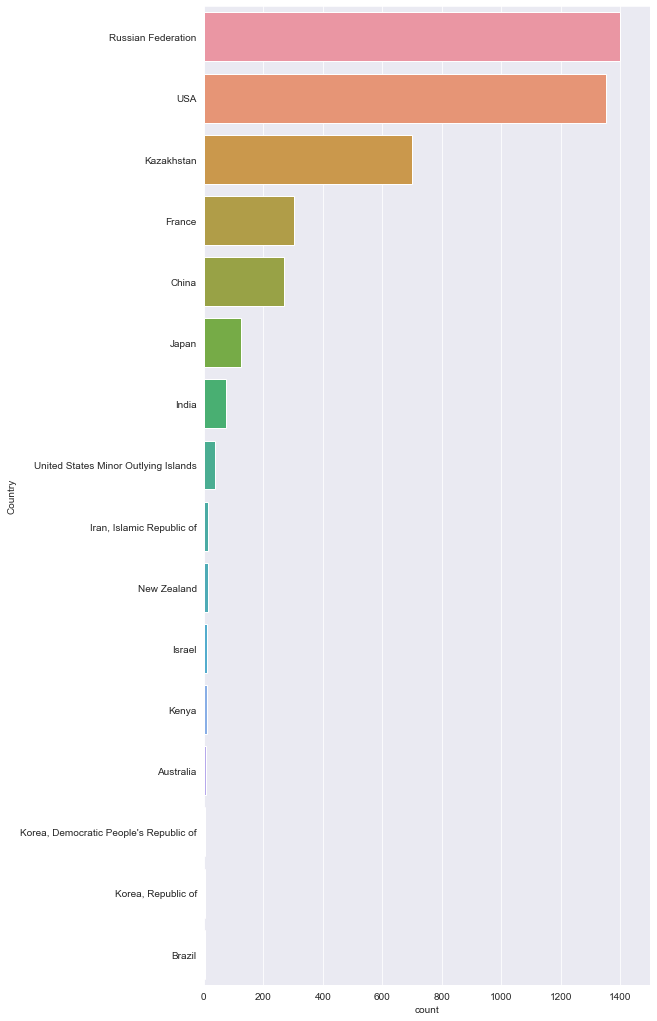

In [16]:
plt.figure(figsize=(8,18))
sns.countplot(y="Country", data=df, order=df["Country"].value_counts().index[:20])
plt.xlim(0,1500)

Note: Korea Republic of is actually North Korea

This statistic is also very simple and easy to understand. US, China and the USSR/ Russia are at the top again. There are also many launches from France, Japan and India.

Similarly, let us see the launch sites. It is not possible to show all the data points in the table, but let us take the top data points

<AxesSubplot:xlabel='count', ylabel='Location'>

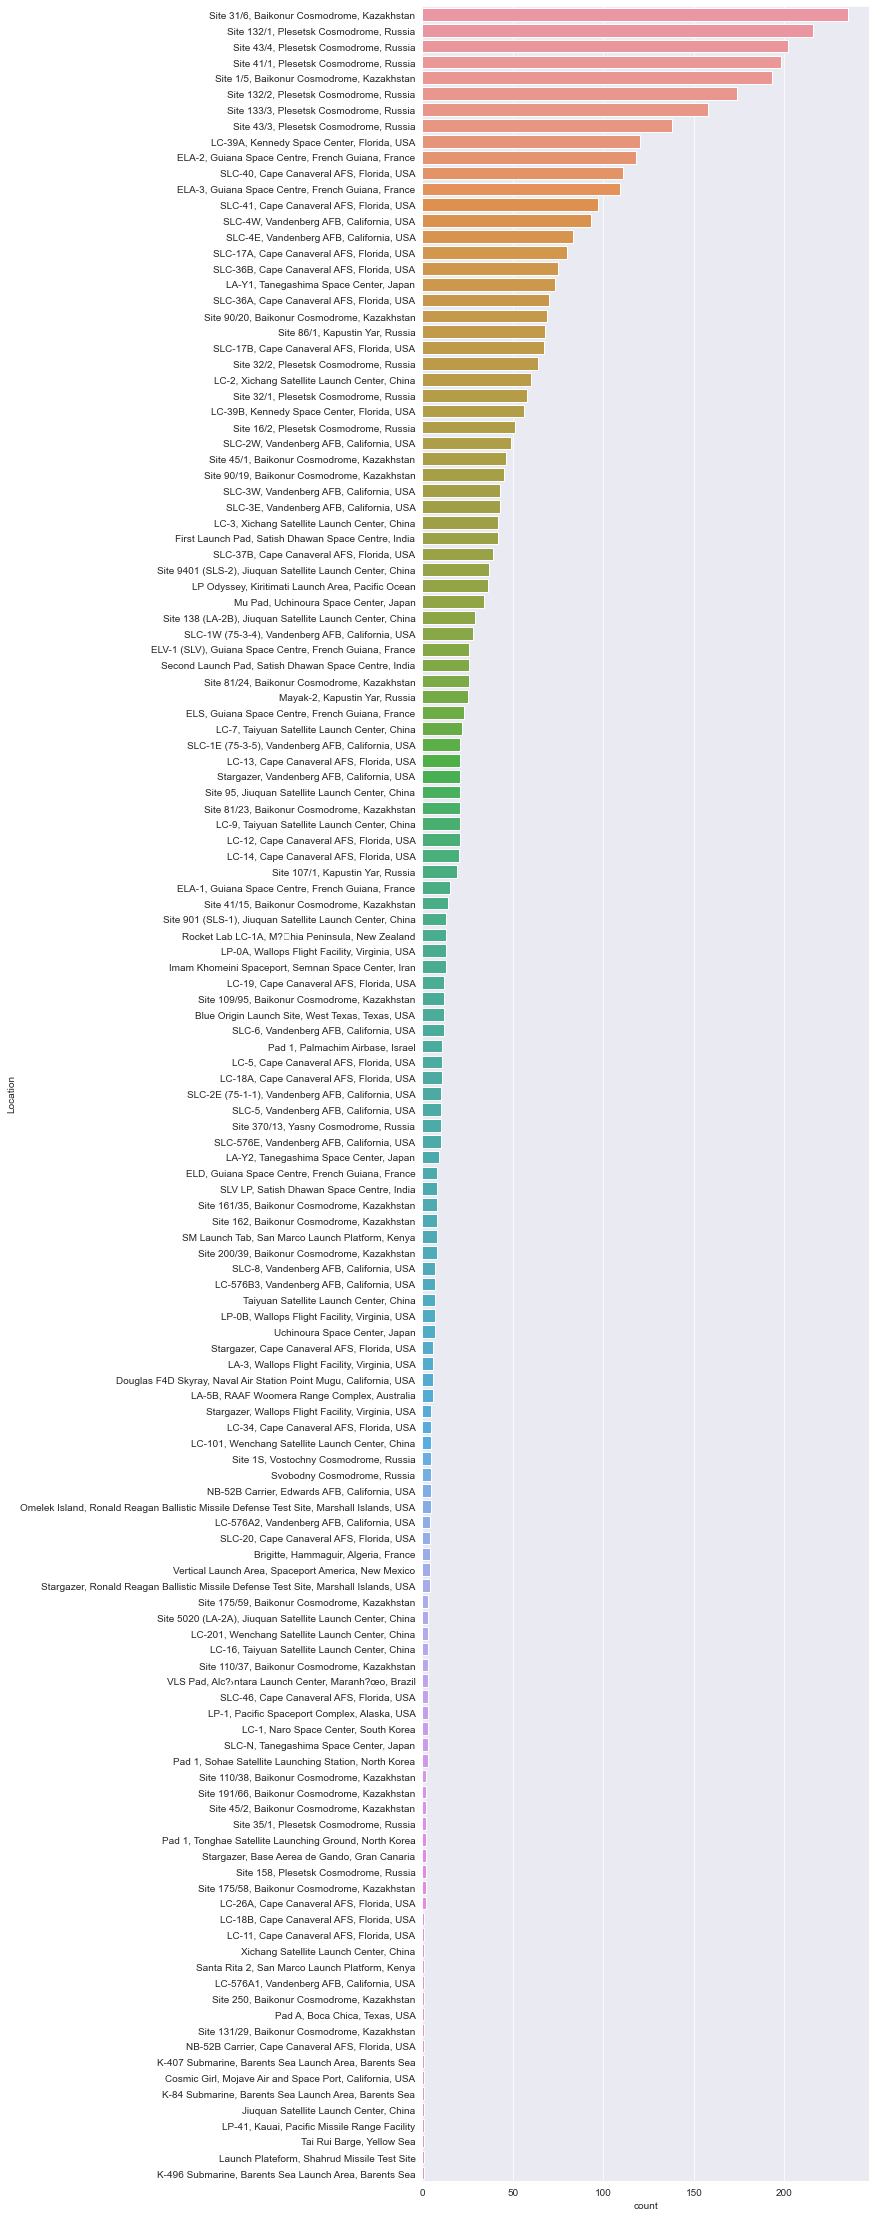

In [17]:
plt.figure(figsize=(8,40))
sns.countplot(y="Location", data=df, order=df["Location"].value_counts().index)

It is now clear that the majority of the human space exploration race is dominated by the US and Russia/USSR. Kennedy Space centre and Baikonur Cosmodrome are the most popular launch sites in human history.

Now, let us check out other data.

First, we check the status of the rocket.

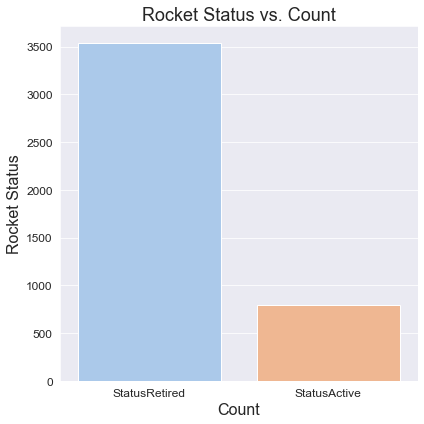

In [18]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x="Rocket_Status", data=df, order=df["Rocket_Status"].value_counts().index, palette="pastel")
ax.axes.set_title("Rocket Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Rocket Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()


Most of the rockets are retired, which is quite natural as many were launched decades ago.

Now, let us analyse the mission status.

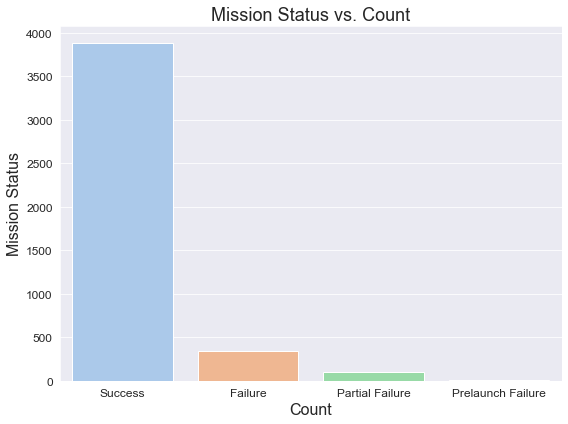

In [19]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Mission_Status", data=df, order=df["Mission_Status"].value_counts().index, palette="pastel")
ax.axes.set_title("Mission Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Mission Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

We see that most of the images are successful, few of them ended in failure.

Now, let us see the number of launches per year.

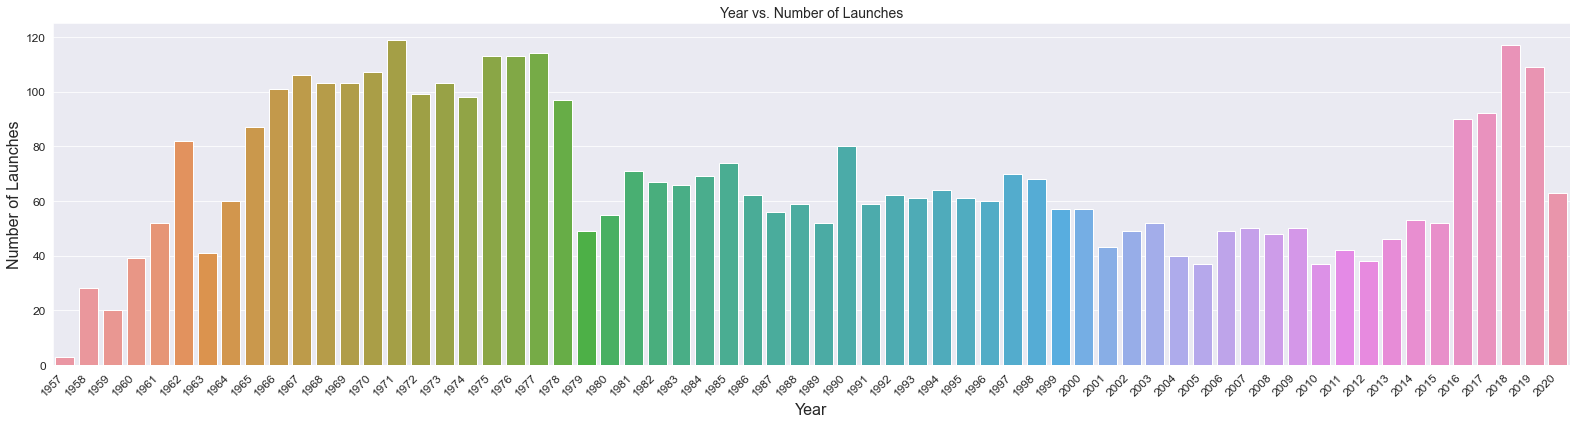

In [20]:
plt.figure(figsize=(22,6))
ax = sns.countplot(x=df['Year'])
ax.axes.set_title("Year vs. Number of Launches",fontsize=14)
ax.set_xlabel("Year",fontsize=16,loc="center")
plt.xticks(rotation=45, ha='right')
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

We can see that the 1960s and 1970s had the most launches. That was the time of the cold war. The US and the USSR were competing, leading to a large number of launches to space.

In recent years, space launches were low, but after 2016 they increased. This is mainly because, in recent years, many private companies have launched rockets.

Now, we check the number of launches on days of the week.



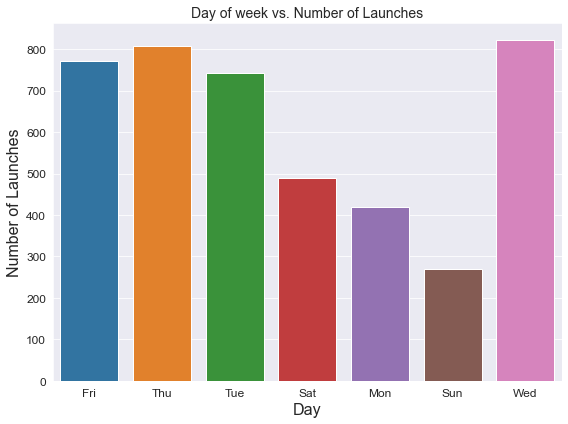

In [21]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df['Day'])
ax.axes.set_title("Day of week vs. Number of Launches",fontsize=14)
ax.set_xlabel("Day",fontsize=16)
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()


We see that majority of the launches are on weekdays, and fewer launches are on Saturday, Sunday and Monday.

Now, let us see the proportion of mission status.

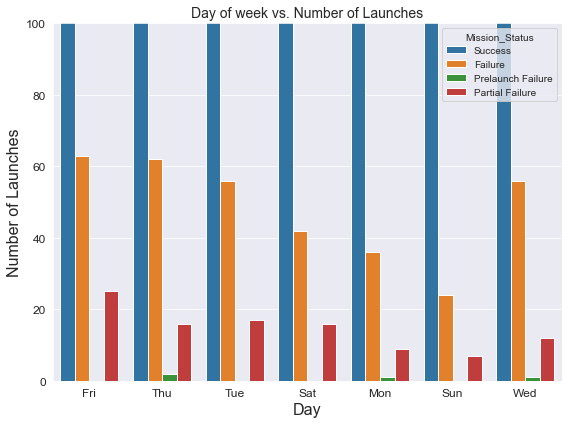

In [22]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Day',hue="Mission_Status",data= df)
ax.axes.set_title("Day of week vs. Number of Launches",fontsize=14)
ax.set_xlabel("Day",fontsize=16)
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.ylim(0,100)
plt.show()


Now, let us see the number of launches per month.

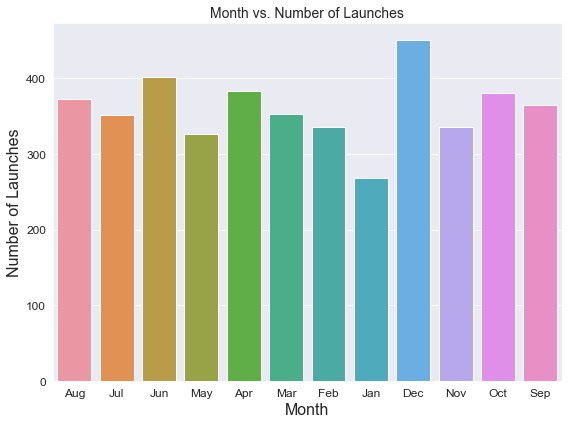

In [23]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Month',data= df)
ax.axes.set_title("Month vs. Number of Launches",fontsize=14)
ax.set_xlabel("Month",fontsize=16)
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()


The number of launches per month is quite random, but we can see maximum launches were held in December.

Now, let us see the distribution of mission status.

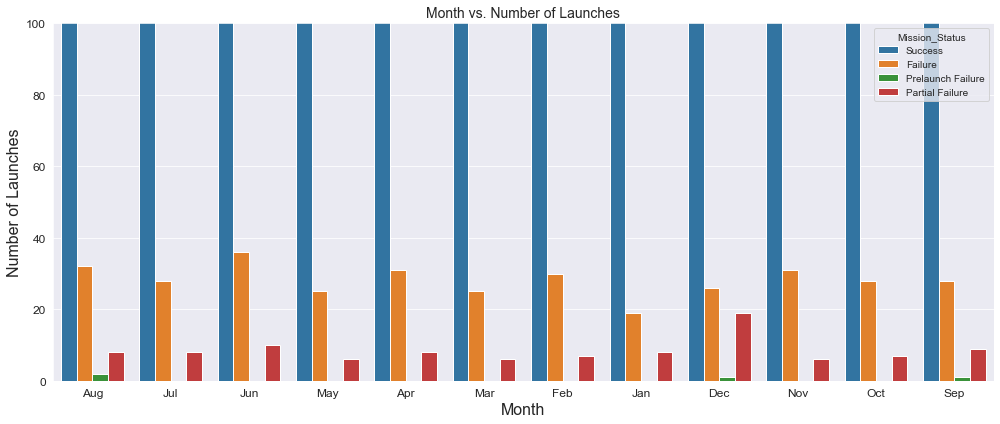

In [24]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Month',hue="Mission_Status",data= df)
ax.axes.set_title("Month vs. Number of Launches",fontsize=14)
ax.set_xlabel("Month",fontsize=16)
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.ylim(0,100)
plt.tight_layout()
plt.show()

Next, we see the date of the month when launches are done.

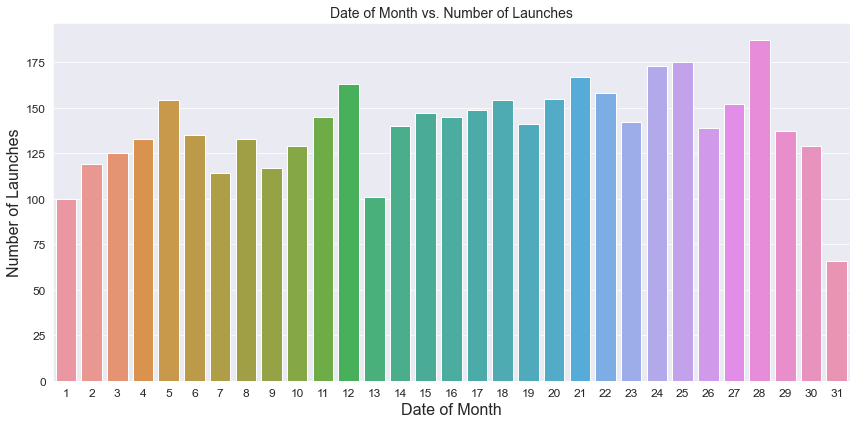

In [25]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df['Date_of_Launch'])
ax.axes.set_title("Date of Month vs. Number of Launches",fontsize=14)
ax.set_xlabel("Date of Month",fontsize=16)
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

The distribution seems to be pretty random. The launch date seems to be more dependent on the day of the week.

# Plotting the World Map:


Regarding the number of launches per country, it would be easy to understand if it was plotted on a world map. Let us implement that.

First, we get the country codes.

In [26]:
def iso(country):
    return countries.get(country).alpha3
df['ISO'] = df.Country.apply(lambda country: iso(country))

Now, we get the value counts

In [27]:
iso = df.ISO.value_counts()

In [28]:
px.choropleth(df, locations=iso.index, color=iso.values, hover_name=iso.index, title='Number of Lauches', color_continuous_scale="emrld")

This visual makes many things very clear. US and Russia/USSR have clearly led the space race.



# Sun Burst chart:


A sunburst chart is a great way to analyse hierarchical data. They consist of concentric layers of circles. The chart segments have each one data category. Let us plot the missions.



In [29]:
fig = px.sunburst(df,path=["Country", "Organisation", "Mission_Status"], values = "Date_of_Launch", title = "Sunburst Chart")
fig.show()

Since the 1950s space has been an aspect of competition between developed nations. First, during the cold war, the US and the USSR sent out a lot of missions. As time passed, other nations started their own spac`e missions.

China, Japan and India have successful space missions now. Prominent space organisations are RSVN USSR, NASA, US Air Force, Arianespace, ISRO, MHI etc.

The USA, USSR/Russia, China and France have launched a large number of space missions. Let us have a look at the space mission history of these countries.

In [30]:
df_imp = df[(df["Country"] == "USA") | (df["Country"] == "Russian Federation") | (df["Country"] == "China") | (df["Country"] == "France")]

In this way, we are able to get the data points for only these specific countries we need.

First, we need to analyse the Space Organisations in these countries.



In [31]:
test = pd.DataFrame(df_imp.groupby(["Country","Organisation"])["Location"].count())
test.rename(columns={"Location":"Mission Numbers"}, inplace=True)

With this, we get the data. Now, we proceed with the plot.

In [32]:
test = test.reset_index()
fig = px.bar(test, x="Mission Numbers", y="Country",
             color='Organisation', text="Organisation")
fig.update_layout(
    title='Mission Numbers by Countries and Corp Names',
    yaxis=dict(
        title='Countries',
        titlefont_size=16,
        tickfont_size=14,
    ),
)
fig.show()

We get the desired plot, and the chart is interactive. We can see that USA and Russia/USSR had the most number of space organizations and launches. France and China are next. Notable space organizations are RSVN USSR, NASA etc.

Let us analyze the launch sites.

In [33]:
test = pd.DataFrame(df_imp.groupby(["Country","Location"])["Location"].count())
test.rename(columns={"Location": "Mission Number"}, inplace = True)
test = test.reset_index(level=[0,1])
test = test.sort_values("Mission Number", ascending = False)
fig = px.bar(test, x='Mission Number', y='Location', color ='Country')
fig.show()

Kennedy Space centre seems to be a popular site for launches.

Let us finally see the number of launches by each of these countries in each year.

In [34]:
test = pd.DataFrame(df_imp.groupby(["Country", "Year"])["Location"].count())
test = test.reset_index(level=[0,1])
fig = px.bar(test, x='Year', y='Location', color ='Country')
fig.show()

Russia/USSR had more launches than the USA in the space race. In recent times, China has also caught up.

The future of space exploration seems very bright. Asteroid mining will be the next big thing in space colonisation. The future will bring lots of opportunities and room for growth.

NASA and ESA are working on the Artemis space program. A large number of funds have been allocated. Artemis III will be the space mission that will take humanity to the moon again.

